# ROOT Tutorial

## 2.3.3 Classes, Methods and Constructors

In [1]:
TF1 f1("func1", "sin(x)/x", 0, 10)

(TF1 &) Name: func1 Title: sin(x)/x


In [2]:
f1.Eval(3)

(double) 0.047040003


In [3]:
f1.Derivative(3)

(double) -0.34567750


In [4]:
f1.Integral(0, 3)

(double) 1.8486525


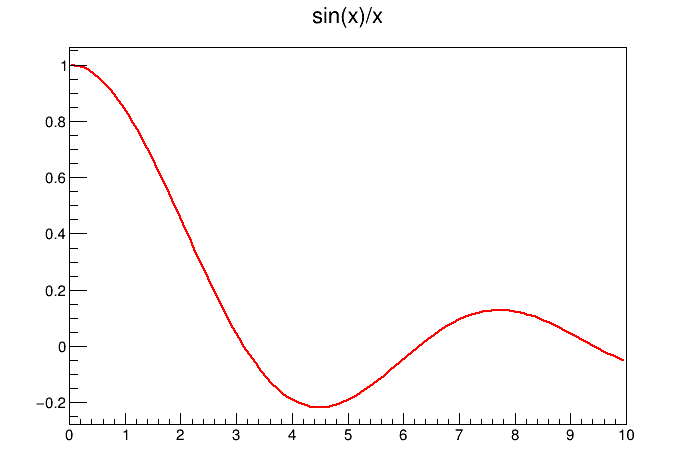

In [ ]:
TCanvas c1;
f1.Draw();
c1.Draw();

## 2.3.5 Building a Multi-Pad Canvas

In [ ]:
TCanvas *myC = new TCanvas("myC", "Test canvas", 1)

(TCanvas *) 0x7fccec240130


In [ ]:
TF1 f2("func2", "cos(x)/x", 0, 10);
TF1 f3("func3", "log(x)/x", 0, 10);
TF1 f4("func4", "exp(x)/x", 0, 10);

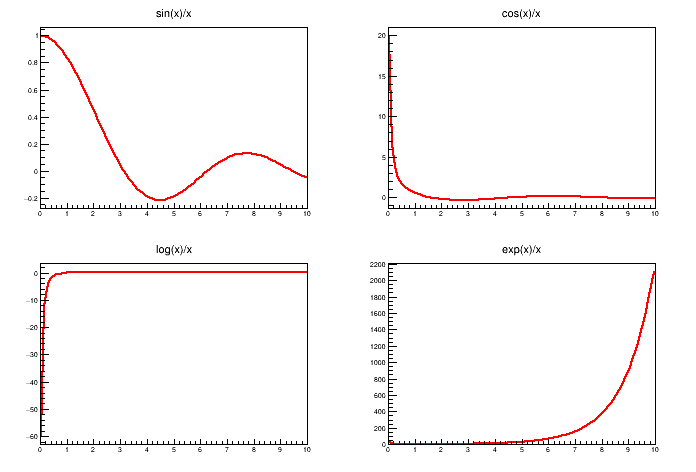

In [ ]:
myC->Divide(2,2);
myC->cd(1); f1.Draw();
myC->cd(2); f2.Draw();
myC->cd(3); f3.Draw();
myC->cd(4); f4.Draw();
myC->Draw();

## 2.4 The ROOT Command Line

* `.?` : List all the Cling commands
* `.L <filename>` : load filename
* `.x <filename>` : load & execute filename

In [ ]:
.! ls

README.md
ROOT Tutorial1.ipynb
c1.C
c1.png
hbookconverted.root


## 2.5.1 Coding Conventions

* Classes begin with `T`: `TLine`, `TTree`

* Non-class types end with `_t`: `Int_t`

* Data members begin with `f`: `fTree`

* Member functions begin with a capital: `Loop()`

* Constants begin with `k`: `kInitialSize`, `kRed`

* Global variables begin with `g`: `gEnv`

* Static data members begin with `fg`: `fgTokenClient`

* Enumeration types begin with `E`: `EColorLevel`

* Locals and parameters begin with a lower case: `nbytes`

* Getters and setters begin with `Get` and `Set`: `SetLast()`, `GetFirst()`


## 2.5.2 Machine Independent Types

```
*    Char_t      Signed Character 1 byte
*    UChar_t     Unsigned Character 1 byte
*    Short_t     Signed Short integer 2 bytes
*    UShort_t    Unsigned Short integer 2 bytes
*    Int_t       Signed integer 4 bytes
*    UInt_t      Unsigned integer 4 bytes
*    Long64_t    Portable signed long integer 8 bytes
*    ULong64_t   Portable unsigned long integer 8 bytes
*    Float_t     Float 4 bytes
*    Double_t    Float 8 bytes
*    Double32_t  Double 8 bytes in memory, written as a Float 4 bytes
*    Bool_t      Boolean (0=false, 1=true)
```

## 2.5.3 TObject

```
*    Object I/O           Read(), Write()
*    Error handling       Warning(), Error(), SysError(), Fatal()
*    Sorting              IsSortable(), Compare(), IsEqual(), Hash()
*    Inspection           Dump(), Inspect()
*    Printing             Print()
*    Drawing              Draw(), Paint(), ExecuteEvent()
*    Bit handling         SetBit(), TestBit()
*    Memory allocation    operatornew and delete, IsOnHeap()
*    Access to meta data  IsA(), InheritsFrom()
*    Object browsing      Browse(), IsFolder()
```

# 2.7 Environment Setup

In [ ]:
gEnv->Print()

Unix.*.Root.UseTTFonts:   true                           [Global]
WinNT.UseNetAPI:          true                           [Global]
Unix.*.Root.UseThreads:   false                          [Global]
Root.CompressionAlgorithm: 0                              [Global]
Root.ShowPath:            false                          [Global]
Root.TMemStat:            0                              [Global]
Root.TMemStat.buffersize: 100000                         [Global]
Root.TMemStat.maxcalls:   5000000                        [Global]
Root.TMemStat.system:                                    [Global]
Root.MemStat:             0                              [Global]
Root.MemStat.size:        -1                             [Global]
Root.MemStat.cnt:         -1                             [Global]
Root.ObjectStat:          0                              [Global]
Root.MemCheck:            0                              [Global]
Root.MemCheckFile:        memcheck.out                   [Global]
Root.Debu

## 2.7.3 Tracking Memory Leaks

In [ ]:
gObjectTable->Print();


Object statistics
class                         cnt    on heap     size    total size    heap size
TList                         146        146      104         15184        15184
TObjectTable                    1          1       32            32           32
TROOT                           1          0      704           704            0
TPluginManager                  1          1       40            40           40
THashTable                      1          1       72            72           72
THashList                       1          1      112           112          112
TEnv                            1          1       56            56           56
TEnvRec                       164        164       96         15744        15744
TUnixSystem                     1          1      648           648          648
TOrdCollection                  5          5       72           360          360
--------------------------------------------------------------------------------
Total:   

## 3.2 Creating Histograms

In [ ]:
TH1* h1 = new TH1I("h1", "h1 title", 100, -4.0, 4.0);
TH2* h2 = new TH2F("h2", "h2 title", 40, 0.0, 2.0, 30, -1.5, 3.5);
TH3* h3 = new TH3D("h3", "h3 title", 80, 0.0, 1.0, 100, -2.0, 2.0, 50, 0.0, 3.0);

TH1* hc = (TH1*)h1->Clone();

TH1* hx = h2->ProjectionX();
TH1* hy = h2->ProjectionY();

In [ ]:
TH2* h = new TH2D(
    /* name  */ "h2",
    /* title */ "Hist with constant bin width",
    /* X-dim */ 100, 0.0, 4.0,
    /* Y-dim */ 200, -3.0, 1.5
);

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


In [ ]:
const Int_t NBINS = 5;
Double_t edges[NBINS + 1] = {0.0, 0.2, 0.3, 0.6, 0.8, 1.0};

TH1* h1_1 = new TH1D(
    "h1",
    "Hist with variable bin width",
    NBINS,
    edges
);

In [ ]:
h1->FillRandom("gaus", 10000);

In [ ]:
TCanvas *tC = new TCanvas("tC", "test", 1);

In [ ]:
tC->cd(1);
h1->Draw();
tC->Draw();

In [ ]:
h1->GetXaxis()->SetTitle("X axis");
h1->GetYaxis()->SetTitle("Y axis");

In [ ]:
tC->cd(1);
h1->Draw();
tC->Draw();

## 3.10 Normalizing Histograms

In [ ]:
Double_t scale = 1.0/h1->Integral();
h1->Scale(scale);

In [ ]:
tC->cd(1);
h1->Draw();
tC->Draw();

In [ ]:
// Create a canvas giving the coordinates and the size
TCanvas *tc1 = new TCanvas("c1", "Profile example",200,10,700,500);
 
// Create a profile with the name, title, the number of bins,
// the low and high limit of the x-axis and the low and high
// limit of the y-axis.
// No option is given so the default is used.
TProfile *hprof = new TProfile("hprof",
                               "Profile of pz versus px",100,-4,4,0,20);
 
// Fill the profile 25000 times with random numbers
Float_t px, py, pz;
for ( Int_t i=0; i<25000; i++) {
    // Use the random number generator to get two numbers following
    // a gaussian distribution with mean=0 and sigma=1
    gRandom->Rannor(px,py);
    pz = px*px + py*py;
    hprof->Fill(px,pz,1);
}
tc1->cd(1);
hprof->Draw();
tc1->Draw();